In [1]:
import pandas as pd
import scipy
import PIL
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin tweets between 02/2021 to 06/2021 with hashtag "BTC", "Bitcoin" - updated periodically

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: toyosibami
Your Kaggle Key: ········


  2%|▏         | 1.00M/49.8M [00:00<00:06, 7.62MB/s]

100%|██████████| 49.8M/49.8M [00:04<00:00, 11.5MB/s]


In [4]:
tweets = pd.read_csv('bitcoin-tweets/Bitcoin_tweets.csv')

/Users/toyosibamidele/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
tweet_data = tweets[['date','text']]
tweet_data['text']=tweet_data['text'].apply(str)

<ipython-input-5-ba8085dfef67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['text']=tweet_data['text'].apply(str)


In [6]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423111 entries, 0 to 423110
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    357574 non-null  object
 1   text    423111 non-null  object
dtypes: object(2)
memory usage: 6.5+ MB


### Bitcoin Prices

In [7]:
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData

In [8]:
bitcoin_price = HistoricalData('BTC-USD',3600,'2019-01-01-00-00').retrieve_data()

Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction...
Data for chunk 0 of 73 extracted
Data for chunk 1 of 73 extracted
Data for chunk 2 of 73 extracted
Data for chunk 3 of 73 extracted
Data for chunk 4 of 73 extracted
Data for chunk 5 of 73 extracted
Data for chunk 6 of 73 extracted
Data for chunk 7 of 73 extracted
Data for chunk 8 of 73 extracted
Data for chunk 9 of 73 extracted
Data for chunk 10 of 73 extracted
Data for chunk 11 of 73 extracted
Data for chunk 12 of 73 extracted
Data for chunk 13 of 73 extracted
Data for chunk 14 of 73 extracted
Data for chunk 15 of 73 extracted
Data for chunk 16 of 73 extracted
Data for chunk 17 of 73 extracted
Data for chunk 18 of 73 extracted
Data for chunk 19 of 73 extracted
Data for chunk 20 of 73 extracted
Data for chunk 21 of 73 extracted
Data f

In [9]:
bitcoin_price.tail()

,low,high,open,close,volume
time,,,,,
2021-07-08 10:00:00,32474.01,32747.44,32579.23,32494.87,310.387727
2021-07-08 11:00:00,32111.00,32740.30,32494.87,32708.09,657.246752
2021-07-08 12:00:00,32505.00,32991.35,32709.40,32603.97,785.480566
2021-07-08 13:00:00,32351.27,32661.17,32603.97,32488.12,759.702535
2021-07-08 14:00:00,32478.60,32705.67,32488.12,32670.30,524.634868


In [10]:
bitcoin_price.to_csv('bitcoin_price_updated.csv', index = False)

In [11]:
bitcoin_price.reset_index(inplace = True)
bitcoin_price.head()

,time,low,high,open,close,volume
0,2019-01-01 01:00:00,3666.40,3693.67,3691.89,3676.66,734.839608
1,2019-01-01 02:00:00,3666.30,3679.00,3676.66,3674.00,423.751963
2,2019-01-01 03:00:00,3673.99,3684.00,3674.00,3682.00,410.519303
3,2019-01-01 04:00:00,3678.25,3700.00,3681.03,3681.80,526.425323
4,2019-01-01 05:00:00,3681.80,3690.00,3681.81,3690.00,256.479062


In [12]:
bitcoin_price.rename(columns={'time':'date'}, inplace=True)

In [13]:
bitcoin_price.head()

,date,low,high,open,close,volume
0,2019-01-01 01:00:00,3666.40,3693.67,3691.89,3676.66,734.839608
1,2019-01-01 02:00:00,3666.30,3679.00,3676.66,3674.00,423.751963
2,2019-01-01 03:00:00,3673.99,3684.00,3674.00,3682.00,410.519303
3,2019-01-01 04:00:00,3678.25,3700.00,3681.03,3681.80,526.425323
4,2019-01-01 05:00:00,3681.80,3690.00,3681.81,3690.00,256.479062


## Data PreProcessing

## Natural Language Processing

## Data Cleansing

In [14]:
import nltk
import re
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])


from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

'''

1. Remove urls
2. Remove hashtags
3. Remove mentions and non-english words
4. Tokenize
5. Remove Puncuations
6. Remove stop words
7. Lemmatizer

'''

def clean_text(data):
    
    tweet_without_url = re.sub(r'http\S+',' ', data)
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    return " ".join(text_cleaned)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/toyosibamidele/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/toyosibamidele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/toyosibamidele/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
tweet_data['clean_text'] = tweet_data['text'].map(lambda x:clean_text(x)) 
tweet_data['clean_text'] = tweet_data['clean_text'].str.lower()
tweet_data.sort_values(by=['date'], inplace=True, ascending=True)
tweet_data.head()

,date,text,clean_text
21523,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,debunking myths
21524,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,weekend read keen learn asset check reading li...
21522,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,bloomberg lp
21521,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",
21520,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,moon


In [16]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423111 entries, 21523 to 393216
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        357574 non-null  object
 1   text        423111 non-null  object
 2   clean_text  423111 non-null  object
dtypes: object(3)
memory usage: 12.9+ MB


### Vader Scoring

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

In [18]:
#load VADER
analyzer = SentimentIntensityAnalyzer()
#Add VADER metrics to dataframe
tweet_data['compound'] = [analyzer.polarity_scores(v)['compound'] for v in tweet_data['text']]
tweet_data['neg'] = [analyzer.polarity_scores(v)['neg'] for v in tweet_data['text']]
tweet_data['neu'] = [analyzer.polarity_scores(v)['neu'] for v in tweet_data['text']]
tweet_data['pos'] = [analyzer.polarity_scores(v)['pos'] for v in tweet_data['text']]

In [19]:
tweet_data.head()

,date,text,clean_text,compound,neg,neu,pos
21523,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,debunking myths,0.0000,0.0,1.000,0.000
21524,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,weekend read keen learn asset check reading li...,0.5411,0.0,0.817,0.183
21522,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,bloomberg lp,0.0000,0.0,1.000,0.000
21521,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",,0.0000,0.0,1.000,0.000
21520,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,moon,0.0000,0.0,1.000,0.000


## Subjectivity and Polarity

In [20]:
from textblob import TextBlob

def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

tweet_data['subjectivity'] = tweet_data['clean_text'].apply(getSubjectivity)
tweet_data['polarity'] = tweet_data['clean_text'].apply(getPolarity)
tweet_data.head()

tweet_data.info()

tweet_data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 423111 entries, 21523 to 393216
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          357574 non-null  object 
 1   text          423111 non-null  object 
 2   clean_text    423111 non-null  object 
 3   compound      423111 non-null  float64
 4   neg           423111 non-null  float64
 5   neu           423111 non-null  float64
 6   pos           423111 non-null  float64
 7   subjectivity  423111 non-null  float64
 8   polarity      423111 non-null  float64
dtypes: float64(6), object(3)
memory usage: 32.3+ MB


date            65537
text                0
clean_text          0
compound            0
neg                 0
neu                 0
pos                 0
subjectivity        0
polarity            0
dtype: int64

In [21]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [22]:
tweet_data['sentiment'] = tweet_data['polarity'].apply(getSentiment)

In [23]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423111 entries, 21523 to 393216
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          357574 non-null  object 
 1   text          423111 non-null  object 
 2   clean_text    423111 non-null  object 
 3   compound      423111 non-null  float64
 4   neg           423111 non-null  float64
 5   neu           423111 non-null  float64
 6   pos           423111 non-null  float64
 7   subjectivity  423111 non-null  float64
 8   polarity      423111 non-null  float64
 9   sentiment     423111 non-null  object 
dtypes: float64(6), object(4)
memory usage: 35.5+ MB


In [24]:
tweet_data['date'] = pd.to_datetime(tweet_data['date'], errors='coerce')
tweet_data['date'] = tweet_data['date'] - pd.to_timedelta(tweet_data['date'].dt.second, unit='s')

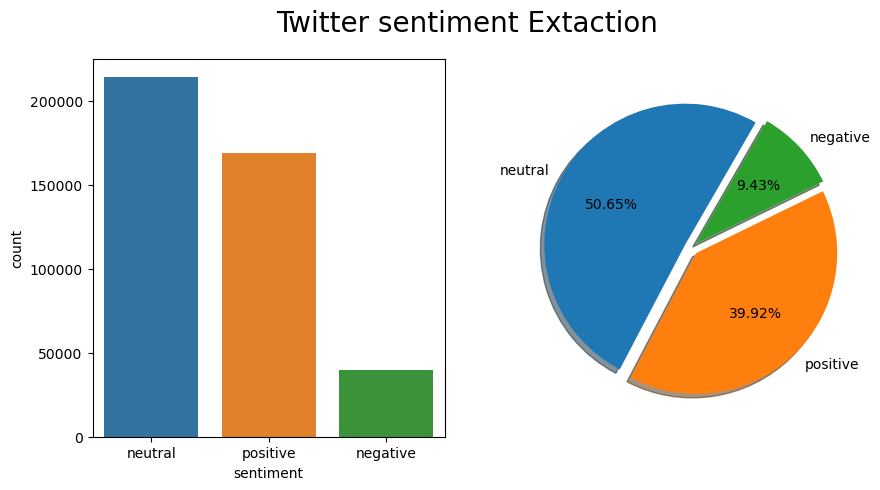

In [25]:
# Displaying target distribution.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), dpi=100)
sns.countplot(tweet_data['sentiment'], ax=axes[0])
axes[1].pie(tweet_data['sentiment'].value_counts(),
            labels=['neutral', 'positive', 'negative'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0.05, 0.05),
            startangle=60)
fig.suptitle('Twitter sentiment Extaction', fontsize=20)
plt.show()

In [26]:
from collections import Counter, defaultdict
import PIL

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/toyosibamidele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


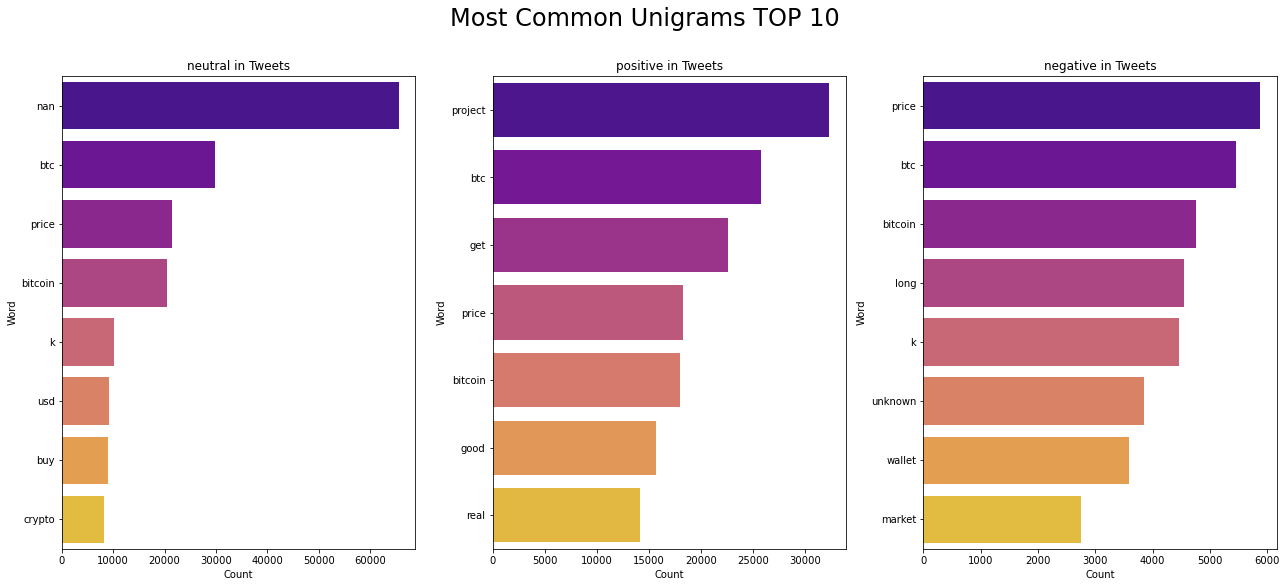

In [27]:
# Displaying most common words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet



lis = [
    tweet_data[tweet_data['sentiment'] == 'neutral']['clean_text'],
    tweet_data[tweet_data['sentiment'] == 'positive']['clean_text'],
    tweet_data[tweet_data['sentiment'] == 'negative']['clean_text']
]


fig, axes = plt.subplots(1, 3, figsize=(18, 8))
axes = axes.flatten()

stop = set(stopwords.words('english'))

for i, j in zip(lis, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:10]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette='plasma', ax=j)
axes[0].set_title('neutral in Tweets')
axes[1].set_title('positive in Tweets')
axes[2].set_title('negative in Tweets')

axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Word')

fig.suptitle('Most Common Unigrams TOP 10', fontsize=24, va='baseline')
plt.tight_layout()

In [28]:
mask = np.array(PIL.Image.open('twitter_mask.jpg'))

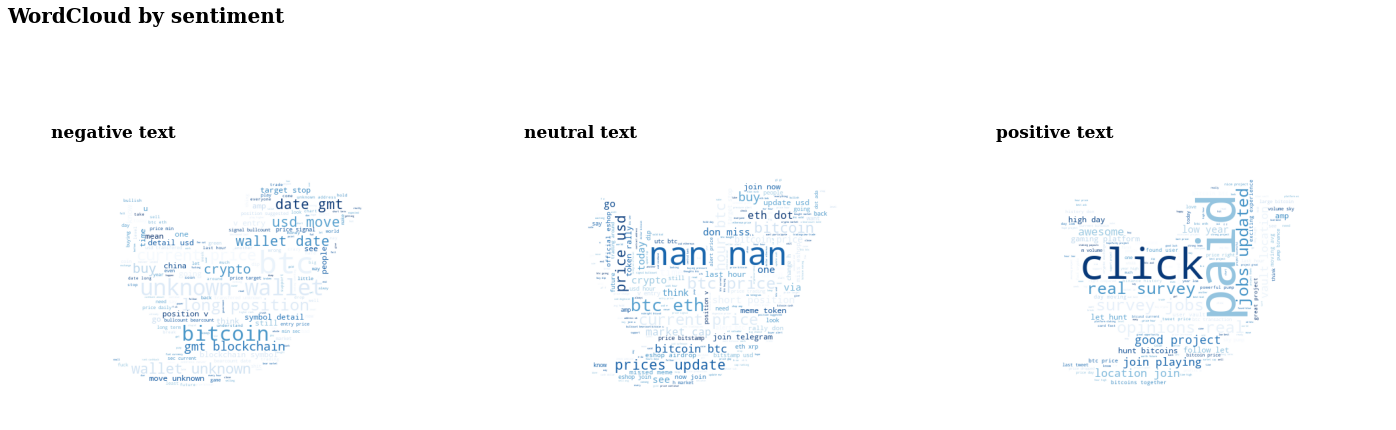

In [29]:
from wordcloud import WordCloud, STOPWORDS
fig, axes = plt.subplots(1,3, figsize=(24,12))
sentiment_list = np.unique(tweet_data['sentiment'])

for i, sentiment in zip(range(3), sentiment_list):
    wc = WordCloud(background_color="white", max_words = 2000, width = 1600, height = 800, mask=mask, colormap="Blues").generate(" ".join(tweet_data[tweet_data['sentiment']==sentiment]['clean_text']))
    
    axes[i].text(0.5,1, "{} text".format(sentiment), fontweight="bold", fontfamily='serif', fontsize=17)
    axes[i].patch.set_alpha(0)
    axes[i].axis('off')
    axes[i].imshow(wc)

fig.text(0.1,0.8,"WordCloud by sentiment ", fontweight="bold", fontfamily='serif', fontsize=20)
plt.show()

In [30]:
sentiment_data = tweet_data.drop(['text', 'clean_text'], axis=1)
sentiment_data.set_index('date',inplace = True)
sentiment_data= sentiment_data.resample('60min').mean()
sentiment_data.reset_index(inplace = True)

In [35]:
sentiment_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3614 non-null   datetime64[ns]
 1   compound      896 non-null    float64       
 2   neg           896 non-null    float64       
 3   neu           896 non-null    float64       
 4   pos           896 non-null    float64       
 5   subjectivity  896 non-null    float64       
 6   polarity      896 non-null    float64       
 7   sentiment     3614 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 226.0+ KB


In [ ]:
# def getSentiment(score):
#     if score < 0:
#         return 'negative'
#     elif score == 0:
#         return 'neutral'
#     else:
#         return 'positive'

In [33]:
# sentiment_data['sentiment'] = sentiment_data['polarity'].apply(getSentiment)

In [37]:
# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), dpi=100)
# sns.countplot(sentiment_data['sentiment'], ax=axes[0])
# axes[1].pie(sentiment_data['sentiment'].value_counts(),
#             labels=['neutral', 'positive', 'negative'],
#             autopct='%1.2f%%',
#             shadow=True,
#             explode=(0.05, 0.05, 0.05),
#             startangle=60)
# fig.suptitle('Twitter sentiment Extaction', fontsize=20)
# plt.show()

In [38]:
sentiment_data = sentiment_data.head(134) #explore first 134 observations

 ### Aggregating for Tweet Volume 

In [39]:
volume = pd.DataFrame(tweet_data['date'])
volume.dropna(inplace = True)

In [40]:
volume[volume.isnull().any(axis=1)]

,date


In [41]:
tweet_volume = volume.groupby(pd.Grouper(key='date',freq='H')).size().reset_index(name='tweet_vol')
tweet_volume[tweet_volume.isnull().any(axis=1)]

,date,tweet_vol


In [42]:
tweet_volume.head()

,date,tweet_vol
0,2021-02-05 10:00:00,11
1,2021-02-05 11:00:00,88
2,2021-02-05 12:00:00,139
3,2021-02-05 13:00:00,131
4,2021-02-05 14:00:00,160


## Merge Data Frame

### Merge Tweet Sentiment Data with Tweet Volume 

In [43]:
data = pd.merge(sentiment_data,tweet_volume, how = "inner", on ="date")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          134 non-null    datetime64[ns]
 1   compound      134 non-null    float64       
 2   neg           134 non-null    float64       
 3   neu           134 non-null    float64       
 4   pos           134 non-null    float64       
 5   subjectivity  134 non-null    float64       
 6   polarity      134 non-null    float64       
 7   sentiment     134 non-null    object        
 8   tweet_vol     134 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 10.5+ KB


In [45]:
bitcoin_price.head()

,date,low,high,open,close,volume
0,2019-01-01 01:00:00,3666.40,3693.67,3691.89,3676.66,734.839608
1,2019-01-01 02:00:00,3666.30,3679.00,3676.66,3674.00,423.751963
2,2019-01-01 03:00:00,3673.99,3684.00,3674.00,3682.00,410.519303
3,2019-01-01 04:00:00,3678.25,3700.00,3681.03,3681.80,526.425323
4,2019-01-01 05:00:00,3681.80,3690.00,3681.81,3690.00,256.479062


In [46]:
final_df = pd.merge(data,bitcoin_price, how = "inner", on ="date")

In [47]:
final_df.head()

,date,compound,neg,neu,pos,subjectivity,polarity,sentiment,tweet_vol,low,high,open,close,volume
0,2021-02-05 10:00:00,0.318018,0.000000,0.885818,0.114182,0.092424,0.077273,positive,11,37239.42,37676.38,37278.08,37441.27,544.936834
1,2021-02-05 11:00:00,0.111397,0.034580,0.893739,0.071648,0.252381,0.101073,positive,88,37435.00,37750.00,37441.27,37717.69,394.873523
2,2021-02-05 12:00:00,0.223211,0.023928,0.873676,0.102367,0.286397,0.111237,positive,139,37581.31,38177.84,37719.99,37899.97,1148.279043
3,2021-02-05 13:00:00,0.118976,0.030611,0.899023,0.070359,0.260310,0.084154,positive,131,37838.26,38348.99,37892.46,38328.88,853.451451
4,2021-02-05 14:00:00,0.149907,0.028931,0.896469,0.074594,0.290310,0.128863,positive,160,38032.00,38342.60,38328.89,38158.31,1242.494873


In [48]:
final_df.tail()

,date,compound,neg,neu,pos,subjectivity,polarity,sentiment,tweet_vol,low,high,open,close,volume
129,2021-02-10 19:00:00,0.150301,0.041188,0.861889,0.096917,0.298256,0.117599,positive,144,44500.00,45292.00,45142.02,45250.02,1171.186635
130,2021-02-10 20:00:00,0.142981,0.034622,0.884547,0.080831,0.301485,0.109621,positive,148,44462.93,45291.98,45250.01,44579.28,947.446787
131,2021-02-10 21:00:00,0.206070,0.037814,0.858731,0.103434,0.276084,0.076539,positive,145,44380.00,45100.62,44579.28,45042.31,888.808292
132,2021-02-10 22:00:00,0.194272,0.027162,0.879831,0.093037,0.216364,0.083294,positive,136,44933.24,45253.75,45034.81,45246.90,499.648788
133,2021-02-10 23:00:00,0.117737,0.032934,0.890566,0.076516,0.238699,0.065874,positive,122,44824.00,45326.40,45246.90,44850.00,631.086751


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          134 non-null    datetime64[ns]
 1   compound      134 non-null    float64       
 2   neg           134 non-null    float64       
 3   neu           134 non-null    float64       
 4   pos           134 non-null    float64       
 5   subjectivity  134 non-null    float64       
 6   polarity      134 non-null    float64       
 7   sentiment     134 non-null    object        
 8   tweet_vol     134 non-null    int64         
 9   low           134 non-null    float64       
 10  high          134 non-null    float64       
 11  open          134 non-null    float64       
 12  close         134 non-null    float64       
 13  volume        134 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 15.7+ KB


<AxesSubplot:>

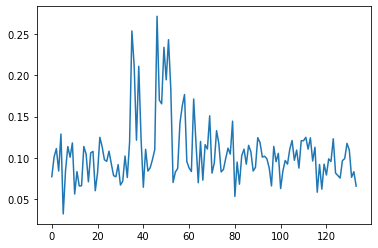

In [50]:
final_df['polarity'].plot()

In [51]:
clean_df = final_df.set_index('date').resample(rule='60T', offset=pd.Timedelta(minutes=60, seconds=0)).interpolate(method='time')

In [52]:
clean_df.tail()

,compound,neg,neu,pos,subjectivity,polarity,sentiment,tweet_vol,low,high,open,close,volume
date,,,,,,,,,,,,,
2021-02-10 19:00:00,0.150301,0.041188,0.861889,0.096917,0.298256,0.117599,positive,144,44500.00,45292.00,45142.02,45250.02,1171.186635
2021-02-10 20:00:00,0.142981,0.034622,0.884547,0.080831,0.301485,0.109621,positive,148,44462.93,45291.98,45250.01,44579.28,947.446787
2021-02-10 21:00:00,0.206070,0.037814,0.858731,0.103434,0.276084,0.076539,positive,145,44380.00,45100.62,44579.28,45042.31,888.808292
2021-02-10 22:00:00,0.194272,0.027162,0.879831,0.093037,0.216364,0.083294,positive,136,44933.24,45253.75,45034.81,45246.90,499.648788
2021-02-10 23:00:00,0.117737,0.032934,0.890566,0.076516,0.238699,0.065874,positive,122,44824.00,45326.40,45246.90,44850.00,631.086751


In [53]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2021-02-05 10:00:00 to 2021-02-10 23:00:00
Freq: 60T
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   compound      134 non-null    float64
 1   neg           134 non-null    float64
 2   neu           134 non-null    float64
 3   pos           134 non-null    float64
 4   subjectivity  134 non-null    float64
 5   polarity      134 non-null    float64
 6   sentiment     134 non-null    object 
 7   tweet_vol     134 non-null    int64  
 8   low           134 non-null    float64
 9   high          134 non-null    float64
 10  open          134 non-null    float64
 11  close         134 non-null    float64
 12  volume        134 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 14.7+ KB


### Google Trends

In [54]:
from pytrends.request import TrendReq

In [55]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ['bitcoin', 'BTC']

search_df = pytrends.get_historical_interest(kw_list, year_start=2019,
                                             month_start=1, day_start=1,
                                             hour_start=0, year_end=2021,
                                             month_end=6, day_end=10, hour_end=0,
                                             cat=0, geo='', gprop='')

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


In [57]:
search_df['google_trends_btc'] =search_df['bitcoin'] +search_df['BTC']
#search_df.reset_index(inplace = True)
search_df.head()

,date,bitcoin,BTC,isPartial,google_trends_btc
0,2019-01-01 00:00:00,0,0,False,0
1,2019-01-01 01:00:00,0,0,False,0
2,2019-01-01 02:00:00,0,0,False,0
3,2019-01-01 03:00:00,0,0,False,0
4,2019-01-01 04:00:00,0,0,False,0


In [58]:
search_df.tail()

,date,bitcoin,BTC,isPartial,google_trends_btc
20662,2021-06-09 20:00:00,77,15,False,92
20663,2021-06-09 21:00:00,76,15,False,91
20664,2021-06-09 22:00:00,75,16,False,91
20665,2021-06-09 23:00:00,71,15,False,86
20666,2021-06-10 00:00:00,67,14,False,81


In [60]:
google_trends = search_df[["date","google_trends_btc"]]
google_trends.tail()

,date,google_trends_btc
20662,2021-06-09 20:00:00,92
20663,2021-06-09 21:00:00,91
20664,2021-06-09 22:00:00,91
20665,2021-06-09 23:00:00,86
20666,2021-06-10 00:00:00,81


In [76]:
model_data = pd.merge(clean_df,google_trends, how = "inner", on ="date")

In [77]:
model_data.tail()

,date,compound,neg,neu,pos,subjectivity,polarity,sentiment,tweet_vol,low,high,open,close,volume,google_trends_btc
130,2021-02-10 19:00:00,0.150301,0.041188,0.861889,0.096917,0.298256,0.117599,positive,144,44500.00,45292.00,45142.02,45250.02,1171.186635,56
131,2021-02-10 20:00:00,0.142981,0.034622,0.884547,0.080831,0.301485,0.109621,positive,148,44462.93,45291.98,45250.01,44579.28,947.446787,57
132,2021-02-10 21:00:00,0.206070,0.037814,0.858731,0.103434,0.276084,0.076539,positive,145,44380.00,45100.62,44579.28,45042.31,888.808292,58
133,2021-02-10 22:00:00,0.194272,0.027162,0.879831,0.093037,0.216364,0.083294,positive,136,44933.24,45253.75,45034.81,45246.90,499.648788,57
134,2021-02-10 23:00:00,0.117737,0.032934,0.890566,0.076516,0.238699,0.065874,positive,122,44824.00,45326.40,45246.90,44850.00,631.086751,54


In [64]:
#model_data = model_data[model_data.google_trends_btc != 0]

In [78]:
# calculate weekly logarithmic return
feb_134_x = model_data.head(134)
feb_134_x['returns'] = (np.log(feb_134_x.close/feb_134_x.close.shift(-1)))

<AxesSubplot:>

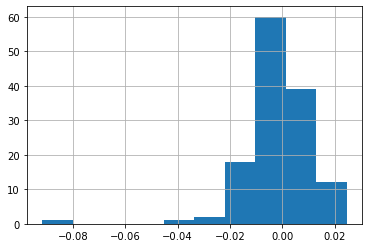

In [79]:
feb_134_x['returns'].hist(bins=10)

<AxesSubplot:>

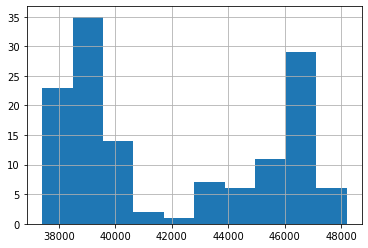

In [80]:
feb_134_x['close'].hist(bins=10)

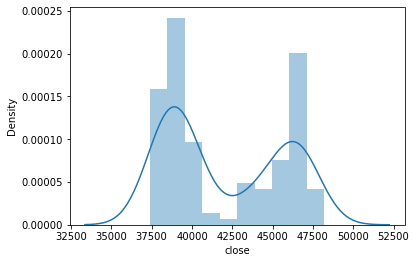

In [81]:
sns_plot = sns.distplot(feb_134_x['close'], bins = 10)
sns_plot.figure.savefig("hist_close.png")

In [ ]:
#feb_134 = model_data.loc['2021-02-04 00:00:00':'2021-02-10 23:00:00']

<AxesSubplot:>

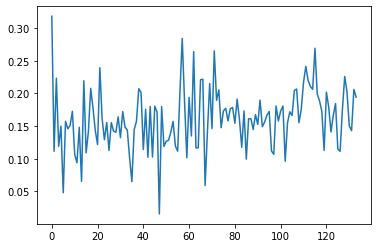

In [82]:
feb_134_x['compound'].plot()

<AxesSubplot:ylabel='Count'>

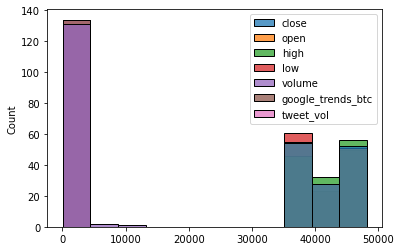

In [84]:
sns.histplot(feb_134_x[["close","open","high",'low','volume','google_trends_btc','tweet_vol']])

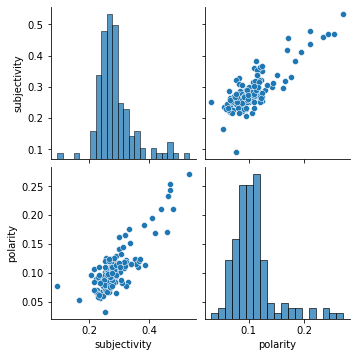

In [86]:
sns_plot = sns.pairplot(feb_134_x[['subjectivity','polarity',]])
sns_plot.savefig("subj_polarity.png")

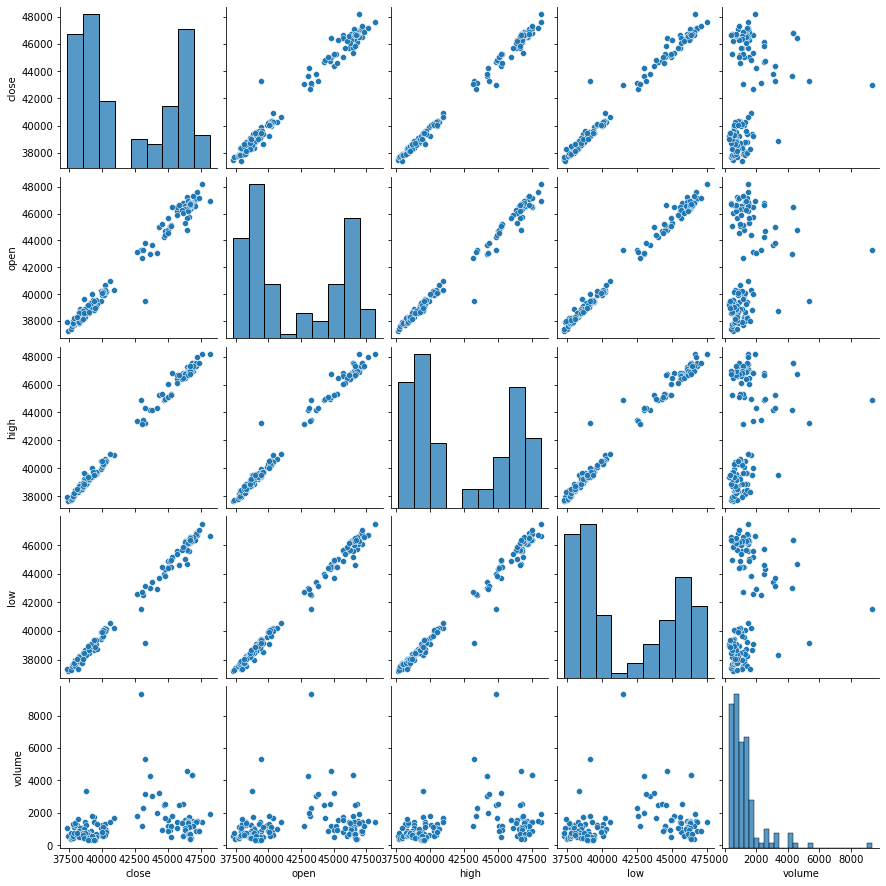

In [87]:
sns_plot = sns.pairplot(feb_134_x[["close","open","high",'low','volume']])
sns_plot.savefig("bitcoin_prices.png")

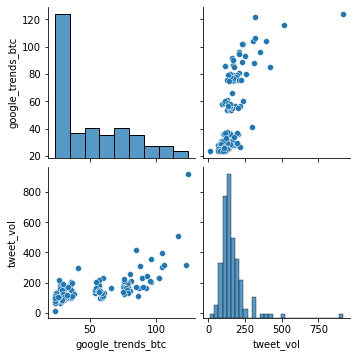

In [88]:
sns_plot=sns.pairplot(feb_134_x[['google_trends_btc','tweet_vol']])
sns_plot.savefig("g_trends_tweet_vol.png")

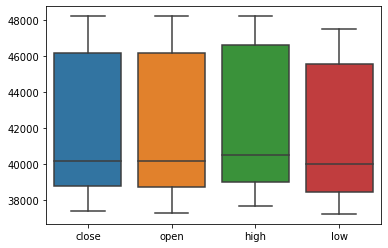

In [89]:
x = feb_134_x[["close","open","high",'low',]]
sns_plot = sns.boxplot(data = x)
sns_plot.figure.savefig("bitcoin_price_boxplot.png")

<AxesSubplot:>

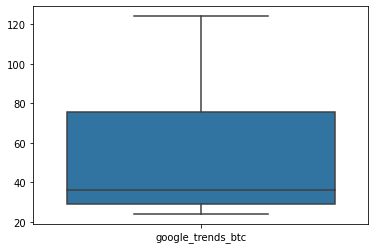

In [90]:
Y = feb_134_x[['google_trends_btc']]
sns.boxplot(data = Y)

<AxesSubplot:>

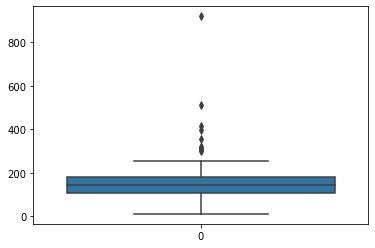

In [91]:
r = feb_134_x['tweet_vol']
sns.boxplot(data = r)

<AxesSubplot:>

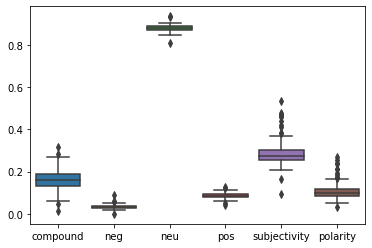

In [92]:
p = feb_134_x[['compound','neg','neu','pos','subjectivity','polarity']]
sns.boxplot(data = p)

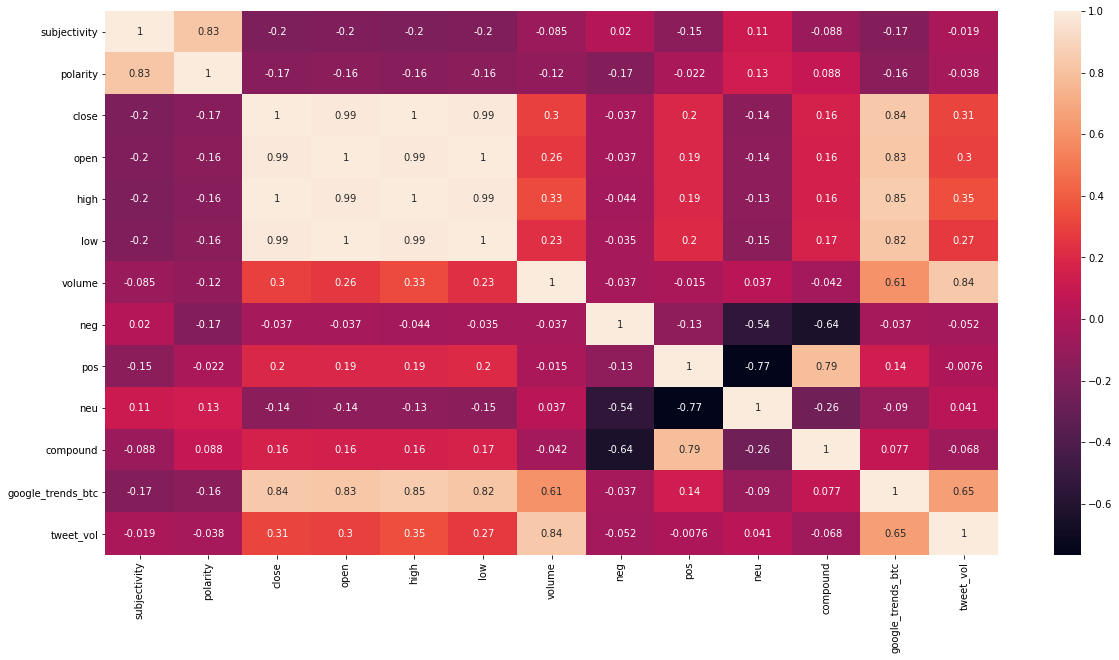

In [95]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns_plot = sns.heatmap(feb_134_x[["subjectivity","polarity","close","open","high",'low','volume','neg','pos','neu','compound','google_trends_btc','tweet_vol']].corr(), annot = True, ax= ax)
sns_plot.figure.savefig("correlation_matrix.png")

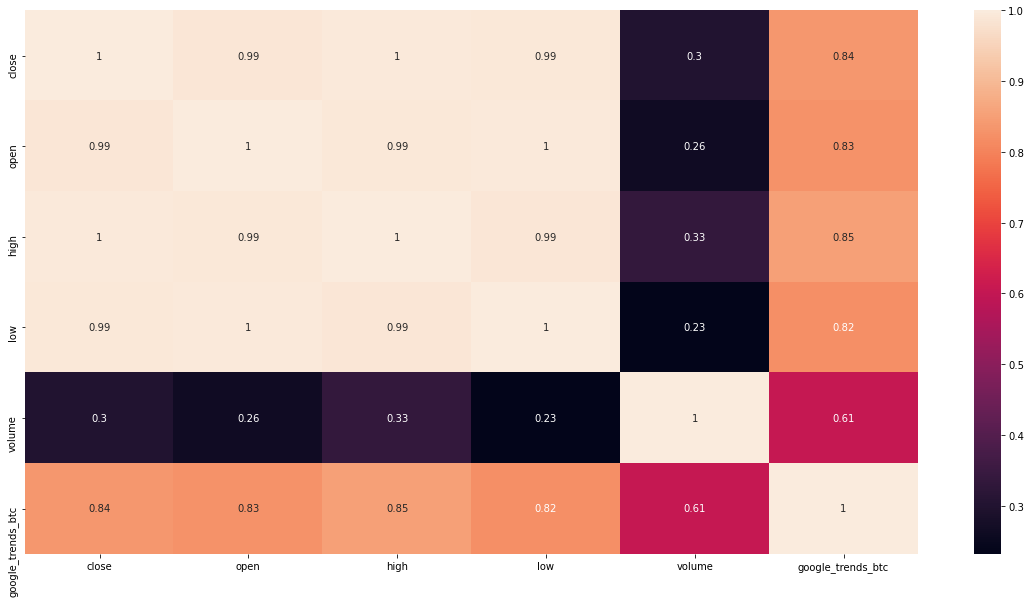

In [96]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns_plot = sns.heatmap(feb_134_x[["close","open","high",'low','volume','google_trends_btc']].corr(), annot = True, ax= ax)
sns_plot.figure.savefig("correlation_matrix_google_price_2021.png")

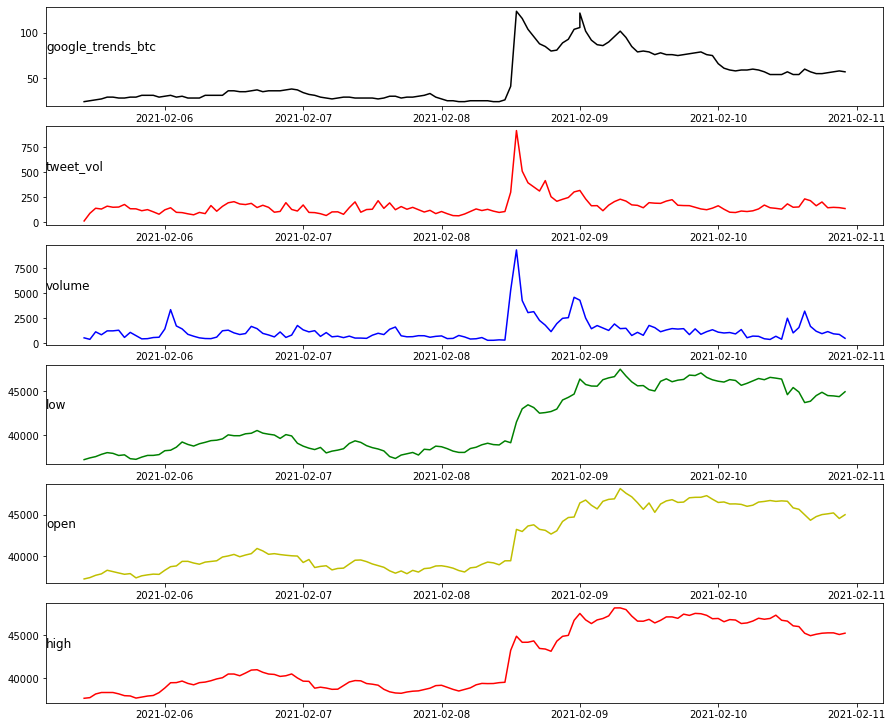

In [98]:
from matplotlib import pyplot as plt
x = feb_134_x[['close','high','open','low','volume','tweet_vol','google_trends_btc']]
values = x.values
groups = [6,5,4,3, 2, 1, 0]
i = 1
# plot each column
colors = ['k', 'r', 'b','g','y','r',]
plt.figure(figsize=(15,15)) 
for group,c  in zip(groups, colors) :
    plt.subplot(len(groups), 1, i)
    plt.plot(feb_134_x['date'],values[:, group], color = c)
    plt.title(x.columns[group], y=0.5, loc='left')
    i += 1
    #plt.savefig('trend_plot.png')
    
plt.savefig('trend_plot.png')    
plt.show()


In [100]:
feb_134_x.to_csv('feb_134_data.csv', index = False)